In [1]:
import pandas as pd
import numpy as np

# Models
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
from varname import nameof
from sklearn.metrics import matthews_corrcoef

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

### Клиенты телекоммуникационной компании 

У вас есть набор данных от некой телекоммуникационной компании. Данные содержат информацию о пользователях компании, их демографических характеристиках, услугах, которыми они пользуются, продолжительности пользования услугами компании, способе оплаты и размере оплаты.

Задача состоит в том, чтобы проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые будут и не будут продлевать свой контракт с компанией).


Gender - пол (male / female) <br>
Senior - пенсионер или нет (1, 0)<br>
Married - состоит ли в браке (Yes, No) <br>
Tenure - сколько месяцев человек является клиентом компании<br>
Phone - подключен ли телефон (Yes, No)<br>
MultiplePhone - подключено ли несколько телефонных каналов (Yes, No, No phone service)<br>
Internet - предоставляются ли услуги интернет соединения (DSL, Fiber optic, No)<br>
Security - подключен ли сервис интернет-безопасности (Yes, No, No internet service)<br>
Backup - активирована ли служба онлайн-резервного копирования (Yes, No, No internet service)<br>
Insurance - есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
Support - подключена ли служба технической поддержки (Yes, No, No internet service)<br>
TV - подключена ли служба потокового телевидения (Yes, No, No internet service)<br>
Movies - активирован ли сервис потокового кино (Yes, No, No internet service)<br>
Contract - тип клиентского контракта (Month-to-month, One year, Two year)<br>
EBilling - использует ли клиент безбумажный биллинг (Yes, No)<br>
PaymentMethod - способ оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
MonthlyCharges - текущий ежемесячный платеж<br>
TotalCharges - общая сумма, которую клиент заплатил за услуги за все время<br>
Churn - покинул ли клиент компанию (Yes or No)<br>

In [2]:
test = pd.read_csv("test.csv", index_col=0)
test

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges
Index,,,,,,,,,,,,,,,,,,,
0,Male,0,No,No,58,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,No,Bank transfer (automatic),99.15,5720.95
1,Female,0,Yes,Yes,26,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.80,2361.8
2,Female,0,No,No,26,Yes,No,Fiber optic,Yes,No,Yes,Yes,No,No,One year,Yes,Credit card (automatic),87.15,2274.1
3,Male,0,No,No,12,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,67.25,832.3
4,Female,0,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.05,75.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,Male,0,No,No,62,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),43.70,2618.3
2391,Female,0,Yes,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.10,43.15
2392,Female,0,Yes,Yes,23,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.75,1849.95


In [3]:
data = pd.read_csv('train.csv', index_col=0)
data.head(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Index,,,,,,,,,,,,,,,,,,,,
0,Female,0,Yes,Yes,67,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,Female,0,No,No,34,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          3591 non-null   object 
 1   Senior          3591 non-null   int64  
 2   Married         3591 non-null   object 
 3   Dependents      3591 non-null   object 
 4   Tenure          3591 non-null   int64  
 5   Phone           3591 non-null   object 
 6   MultiplePhones  3591 non-null   object 
 7   Internet        3591 non-null   object 
 8   Security        3591 non-null   object 
 9   Backup          3591 non-null   object 
 10  Insurance       3591 non-null   object 
 11  Support         3591 non-null   object 
 12  TV              3591 non-null   object 
 13  Movies          3591 non-null   object 
 14  Contract        3591 non-null   object 
 15  EBilling        3591 non-null   object 
 16  PaymentMethod   3591 non-null   object 
 17  MonthlyCharges  3591 non-null   f

In [5]:
for col in data.columns:
    print()
    print(col,': ', data[col].unique())


Gender :  ['Female' 'Male']

Senior :  [0 1]

Married :  ['Yes' 'No']

Dependents :  ['Yes' 'No']

Tenure :  [67 34 72 63 69  3 68  2 19 41 54 36 10 12 18 38 65  8  9 35 44  1 16 70
 57 47 33 24 55 43 11 71 60 15  7 66 17 58 23  6 14 48 39 50 13 52 27 37
 26  5 30 51 29 46 45 49 21 56 22 64 25 61  4 53 32 40 28 59 62 31 20 42
  0]

Phone :  ['No' 'Yes']

MultiplePhones :  ['No phone service' 'Yes' 'No']

Internet :  ['DSL' 'Fiber optic' 'No']

Security :  ['Yes' 'No' 'No internet service']

Backup :  ['Yes' 'No' 'No internet service']

Insurance :  ['Yes' 'No' 'No internet service']

Support :  ['Yes' 'No' 'No internet service']

TV :  ['Yes' 'No' 'No internet service']

Movies :  ['No' 'Yes' 'No internet service']

Contract :  ['Two year' 'One year' 'Month-to-month']

EBilling :  ['No' 'Yes']

PaymentMethod :  ['Credit card (automatic)' 'Mailed check' 'Bank transfer (automatic)'
 'Electronic check']

MonthlyCharges :  [ 54.2   64.4   96.6  ... 114.35  41.35  58.35]

TotalCharges :  [

<AxesSubplot:>

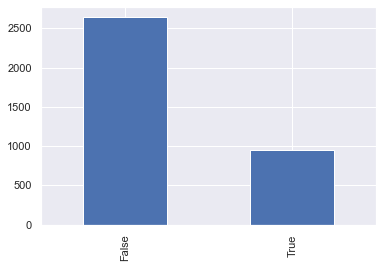

In [6]:
data['Churn'].value_counts().plot(kind='bar')

In [7]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Senior,Tenure,MonthlyCharges
Index,,,
3301,1,8,101.35
3291,0,14,48.80
3153,0,1,19.75
3184,0,72,66.75
2922,0,16,20.10


In [8]:
data.TotalCharges.value_counts().head(10)

19.55    6
20.2     6
         6
19.9     4
20.3     4
45.3     4
20.5     4
20.05    4
25.25    3
74.9     3
Name: TotalCharges, dtype: int64

In [9]:
data.TotalCharges = data.TotalCharges.replace(' ', 0).astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          3591 non-null   object 
 1   Senior          3591 non-null   int64  
 2   Married         3591 non-null   object 
 3   Dependents      3591 non-null   object 
 4   Tenure          3591 non-null   int64  
 5   Phone           3591 non-null   object 
 6   MultiplePhones  3591 non-null   object 
 7   Internet        3591 non-null   object 
 8   Security        3591 non-null   object 
 9   Backup          3591 non-null   object 
 10  Insurance       3591 non-null   object 
 11  Support         3591 non-null   object 
 12  TV              3591 non-null   object 
 13  Movies          3591 non-null   object 
 14  Contract        3591 non-null   object 
 15  EBilling        3591 non-null   object 
 16  PaymentMethod   3591 non-null   object 
 17  MonthlyCharges  3591 non-null   f

In [10]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Senior,Tenure,MonthlyCharges,TotalCharges
Index,,,,
3378,1,1,46.00,46.0
2680,0,1,45.60,45.6
281,0,68,99.55,6668.0
40,0,69,85.35,5897.4
3280,0,2,45.85,81.0


In [11]:
data = data.replace({'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Phone': {'Yes': 1, 'No': 0},
                     'EBilling' : {'Yes': 1, 'No': 0},
                     'Dependents' : {'Yes': 1, 'No': 0}
                    })

In [12]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,EBilling,MonthlyCharges,TotalCharges
Index,,,,,,,,,
929,1,0,0,0,8,1,1,73.50,632.20
1416,1,0,1,1,41,1,0,79.90,3326.20
3486,1,1,1,1,57,1,1,95.30,5567.45
1709,0,0,1,1,7,1,0,20.65,150.00
1839,0,0,0,0,67,1,1,118.35,7804.15


In [13]:
data.describe()

,Gender,Senior,Married,Dependents,Tenure,Phone,EBilling,MonthlyCharges,TotalCharges
count,3591.000,3591.000,3591.000,3591.000,3591.000,3591.000,3591.000,3591.000,3591.000
mean,0.489,0.157,0.485,0.301,31.971,0.901,0.595,64.488,2246.080
std,0.500,0.363,0.500,0.459,24.580,0.299,0.491,30.057,2254.592
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18.400,0.000
25%,0.000,0.000,0.000,0.000,8.000,1.000,0.000,35.400,376.175
50%,0.000,0.000,0.000,0.000,28.000,1.000,1.000,70.300,1382.900
75%,1.000,0.000,1.000,1.000,55.000,1.000,1.000,89.450,3756.425
max,1.000,1.000,1.000,1.000,72.000,1.000,1.000,118.750,8684.800


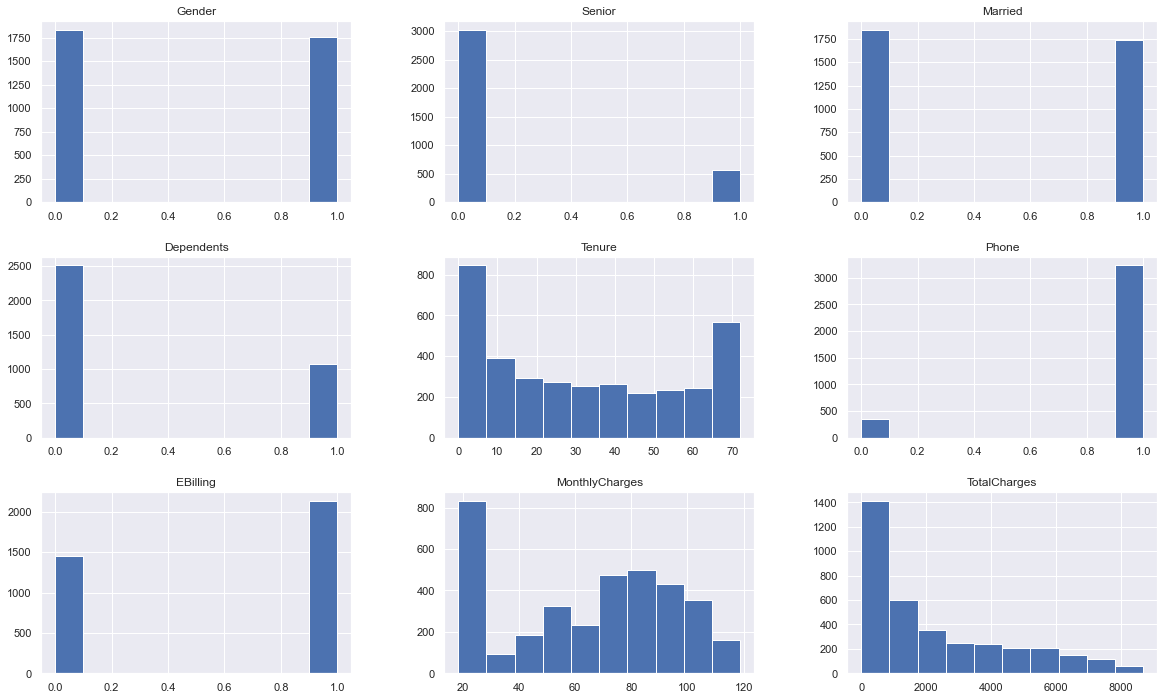

In [14]:
numeric_data.hist(figsize=(20,12));

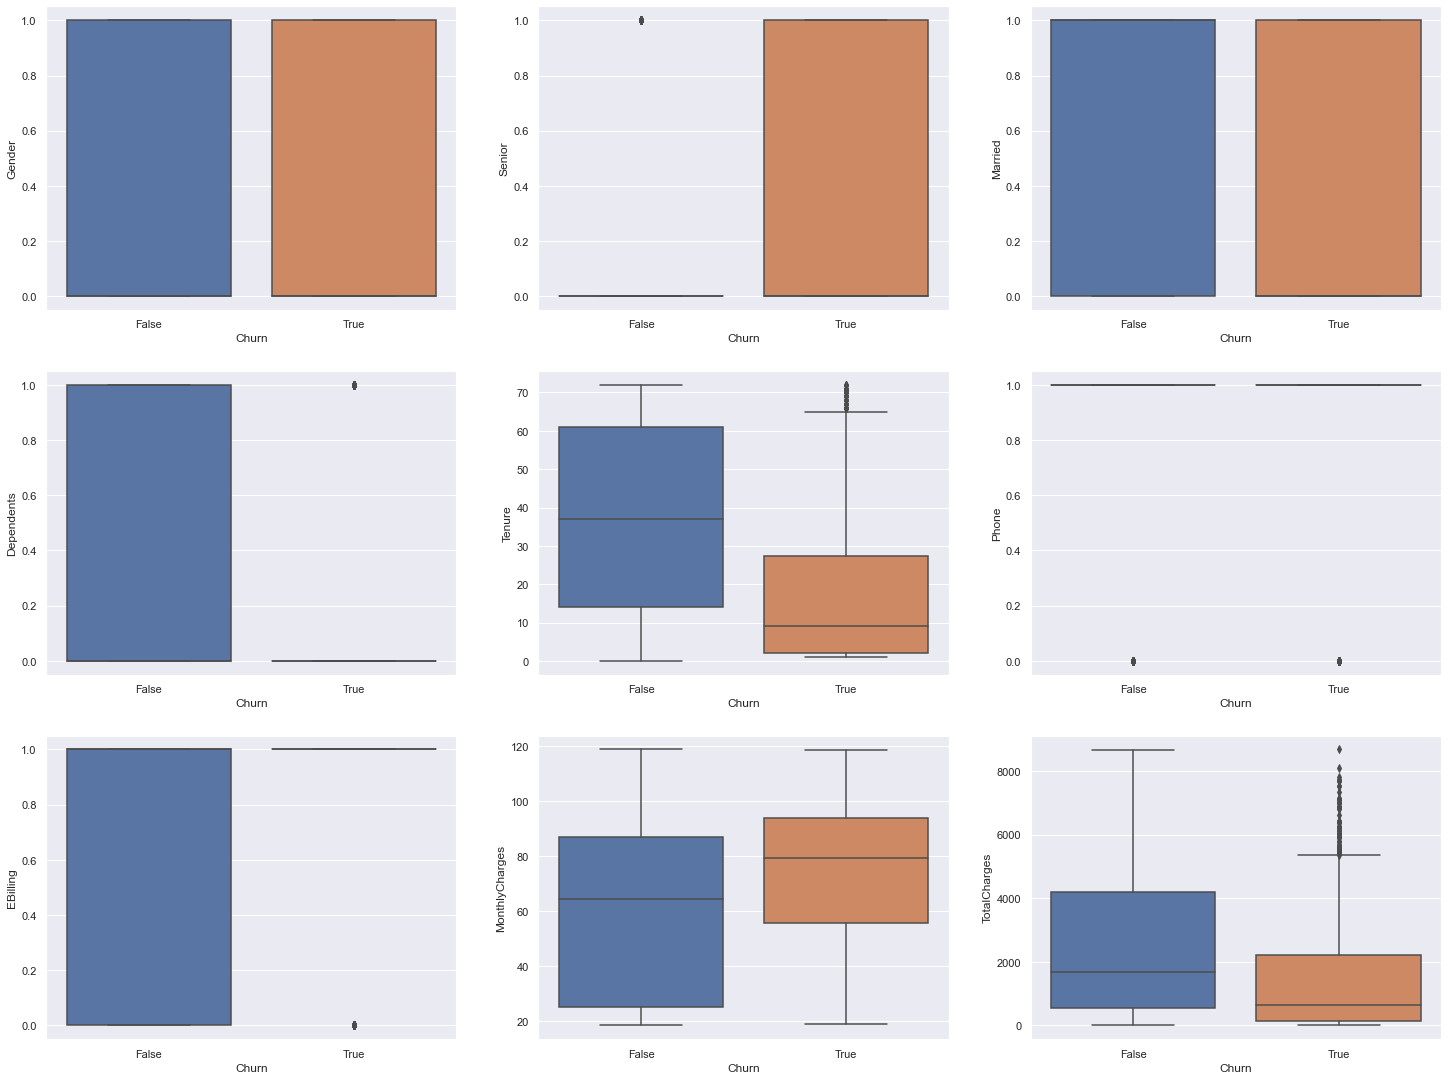

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 19))

for idx, feat in  enumerate(numeric_data.columns):
    sns.boxplot(x='Churn', y=feat, data=data, ax=axes[idx // 3, idx % 3])
    axes[idx // 3, idx % 3].set_xlabel('Churn')
    axes[idx // 3, idx % 3].set_ylabel(feat);

In [16]:
data = data.loc[((data['TotalCharges'] <= 8000) & (data['Churn'] == True)) | (data['Churn'] == False) ]

In [17]:
not_num_columns = list(set(data.columns) -  set(['Gender','Senior','Married','Tenure','Phone','MonthlyCharges', 'TotalCharges', 'Churn', 'EBilling', 'Dependents']))
categorial_data = data[not_num_columns]
final_data = categorial_data.join(numeric_data)
final_data

,TV,MultiplePhones,PaymentMethod,Backup,Contract,Security,Internet,Support,Insurance,Movies,Gender,Senior,Married,Dependents,Tenure,Phone,EBilling,MonthlyCharges,TotalCharges
Index,,,,,,,,,,,,,,,,,,,
0,Yes,No phone service,Credit card (automatic),Yes,Two year,Yes,DSL,Yes,Yes,No,1,0,1,1,67,0,0,54.20,3623.95
1,No,Yes,Mailed check,Yes,One year,Yes,DSL,Yes,No,No,1,0,0,0,34,1,1,64.40,2088.75
2,No,Yes,Bank transfer (automatic),Yes,Two year,Yes,Fiber optic,Yes,Yes,No,1,1,1,0,72,1,1,96.60,6827.50
3,No,No,Mailed check,Yes,Two year,Yes,DSL,Yes,Yes,No,1,0,1,1,63,1,0,63.55,4014.20
4,Yes,Yes,Credit card (automatic),Yes,One year,No,Fiber optic,No,Yes,No,0,0,1,1,69,1,0,95.75,6511.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,Yes,No,Electronic check,No,Month-to-month,No,Fiber optic,No,No,No,1,0,0,0,5,1,0,80.20,384.25
3587,Yes,No,Credit card (automatic),No,Two year,Yes,DSL,No,Yes,Yes,1,0,1,1,71,1,0,77.55,5574.35
3588,No,Yes,Credit card (automatic),Yes,One year,No,Fiber optic,No,Yes,No,1,0,1,0,68,1,0,86.45,5762.95


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(final_data, 
                                                    data.Churn,
                                                    test_size = 0.20,
                                                    random_state = 1234)


In [19]:
final_data

,TV,MultiplePhones,PaymentMethod,Backup,Contract,Security,Internet,Support,Insurance,Movies,Gender,Senior,Married,Dependents,Tenure,Phone,EBilling,MonthlyCharges,TotalCharges
Index,,,,,,,,,,,,,,,,,,,
0,Yes,No phone service,Credit card (automatic),Yes,Two year,Yes,DSL,Yes,Yes,No,1,0,1,1,67,0,0,54.20,3623.95
1,No,Yes,Mailed check,Yes,One year,Yes,DSL,Yes,No,No,1,0,0,0,34,1,1,64.40,2088.75
2,No,Yes,Bank transfer (automatic),Yes,Two year,Yes,Fiber optic,Yes,Yes,No,1,1,1,0,72,1,1,96.60,6827.50
3,No,No,Mailed check,Yes,Two year,Yes,DSL,Yes,Yes,No,1,0,1,1,63,1,0,63.55,4014.20
4,Yes,Yes,Credit card (automatic),Yes,One year,No,Fiber optic,No,Yes,No,0,0,1,1,69,1,0,95.75,6511.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,Yes,No,Electronic check,No,Month-to-month,No,Fiber optic,No,No,No,1,0,0,0,5,1,0,80.20,384.25
3587,Yes,No,Credit card (automatic),No,Two year,Yes,DSL,No,Yes,Yes,1,0,1,1,71,1,0,77.55,5574.35
3588,No,Yes,Credit card (automatic),Yes,One year,No,Fiber optic,No,Yes,No,1,0,1,0,68,1,0,86.45,5762.95


In [20]:
X_train_dummy = pd.get_dummies(data = X_train, columns = not_num_columns)
X_test_dummy = pd.get_dummies(data = X_test, columns = not_num_columns)

In [21]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train_dummy)
X_test = sc.transform (X_test_dummy)

In [22]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, Y_train)

dummy_predictions = dummy.predict(X_test)


In [23]:
matthews_corrcoef(Y_test, dummy_predictions)

C:\Users\Alexey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


0.0

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)

dt_train_predictions = dt.predict(X_test)

matthews_corrcoef(Y_test, dt_train_predictions)

0.3741551869947001

In [25]:
smart_dt = DecisionTreeClassifier(min_samples_leaf = 7, max_depth = 17).fit(X_train, Y_train)
print (f'Tree depth: {smart_dt.get_depth()}')

print('Test evaluation')
sdt_test_predictions = smart_dt.predict (X_test)
matthews_corrcoef(Y_test, sdt_test_predictions)

Tree depth: 14
Test evaluation


0.3866140829383568

In [26]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

tree_params = {'min_samples_leaf': [5, 7, 9, 11],
               'max_depth': [12, 15, 17, 19],
               'criterion': ['gini', 'entropy']              
              }

grid = GridSearchCV(DecisionTreeClassifier(),
                    tree_params,
                    refit=True,
                    scoring='f1_macro',
                    n_jobs = -1,
                    cv=StratifiedKFold(n_splits = 5),
                    verbose=2
                   )

grid_best_model = grid.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    4.7s finished


In [27]:
print('Test evaluation')
gbm_test_predictions = grid_best_model.predict (X_test)
matthews_corrcoef(Y_test, gbm_test_predictions)

Test evaluation


0.41782460757855633

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()

cv_lr_predictions = cross_val_predict(lr, X_train, Y_train, cv = 7, n_jobs = -1)

In [29]:

lr = LogisticRegression().fit(X_train, Y_train)
print('Test evaluation')
lr_test_predictions = lr.predict (X_test)
matthews_corrcoef(Y_test, lr_test_predictions)


Test evaluation


0.5362011812021651